# <center> Digit Recognizer Using Random Forest </center>

<img src="img/digits_recognition.jpg" height="500" width="500">

- - -
## <u>Contents</u>
### Part1: Preprocess Data
    1. Import necessary libraries
    2. Get data and extract information
### Part2: Train and Test Data
    3. Train and Test with Random Forest
- - - 

- - -
## Part1: Preprocess Data
- - -
### 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

### 2. Get data and extract information

#### 2.1 Import titanic data from data folder

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2 Observe overall detail fo the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


#### 2.3 Furthur observe data through visualization

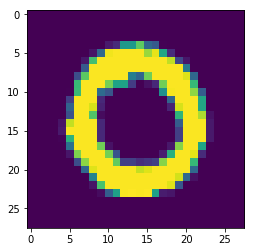

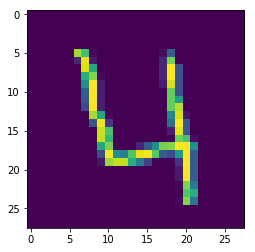

In [6]:
# get pixels the first row and save them in img1
img1 =data.iloc[1,1:].values
img1 = img1.reshape(28,28).astype('uint8')

# get pixels the thrid row and save them in img2
img2 =data.iloc[3,1:].values
img2 = img2.reshape(28,28).astype('uint8')

# visualize img1 and img2
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

#### 2.4 Separate Train & Test data

In [9]:
# The df_x include all data except the label column
df_x=data.iloc[:,1:]

# The df_y include the label column
df_y=data.iloc[:,0]

# Split train and test data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

# Check train data
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- - -
## Part2: Train and Test Data
- - -

### 3. Train and Test with Random Forest

#### 3.1 Train with Random Forest and test model

In [10]:
# Random forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

In [14]:
s=y_test.values
count=0

#### 3.2 Evaluate Random Forest model

In [11]:
# s contains actual data of Titanic survivors
s=y_test.values

# counts the number of correct prediction for random forest model
count=0

# compare predicted result from random forest to the actual survivor data
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1
        
# Calculate the accuracy of the decision tree model
accuracy = count/len(pred)

# Print accuracy of the decision tree model
accuracy

0.9608333333333333